<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Pandas (Nice)</span></div>

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# plt.xkcd()

In [2]:
df = pd.read_excel('finalised_scores.xlsx')

## 1 Seaborn

Essentially, to plot stuff in seaborn, just pass the function the data and specify the x, y, hue, style, size, row, and col dimensions (or other related parameters), and seaborn will automatically generate the figure with the specified parameters  

If nothing is specified and only a 2D data structure is given to seaborn, it will automatically plot a chart based on the rows and columns of the data

### 1.1 Setting the context

In [3]:

# Your code here
sns.set_context("paper")
sns.set_style("darkgrid")

### 1.2 Some Examples

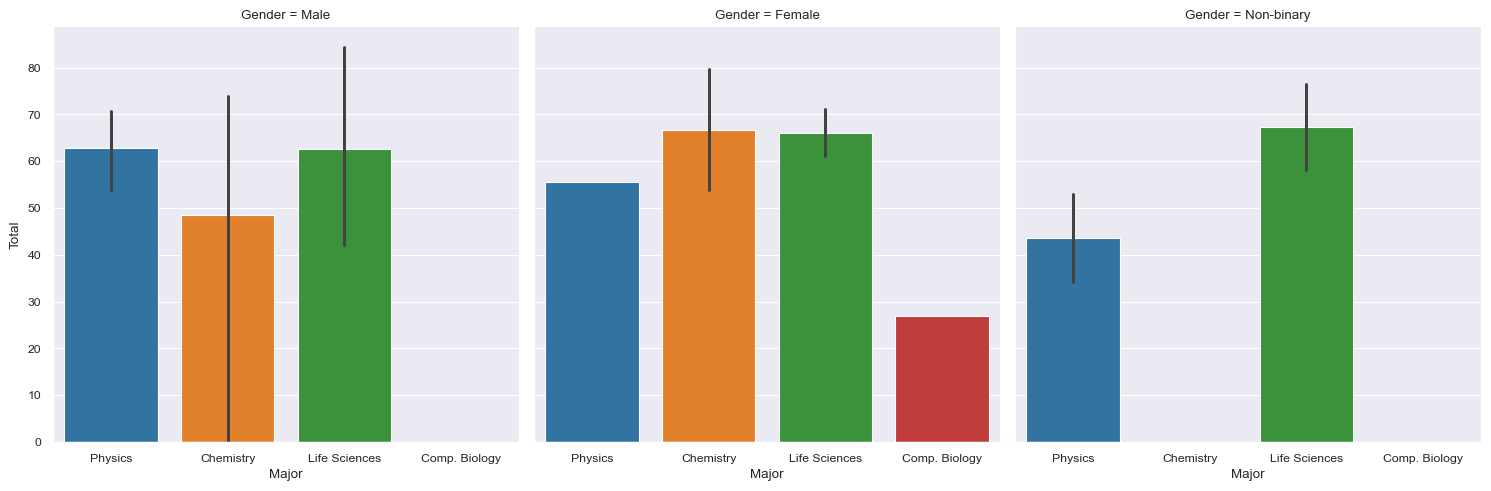

In [4]:

# Your code here
sns.catplot(data=df, x="Major", y="Total", col="Gender", kind="bar")
plt.show()

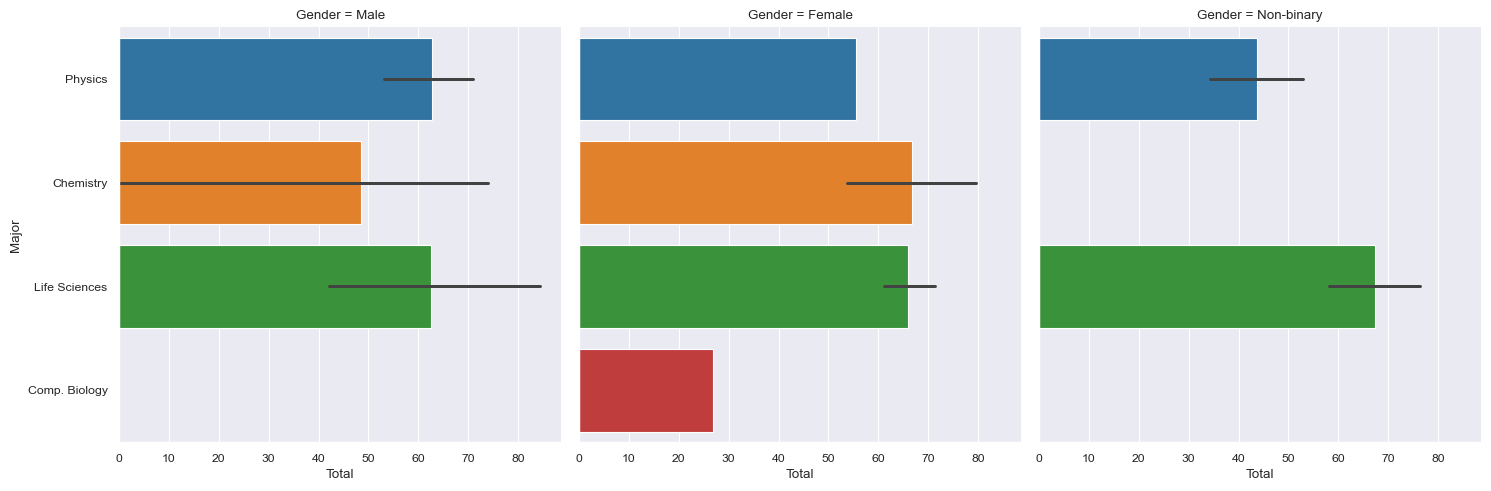

In [5]:
sns.catplot(data=df, x="Total", y="Major", col="Gender", kind="bar")

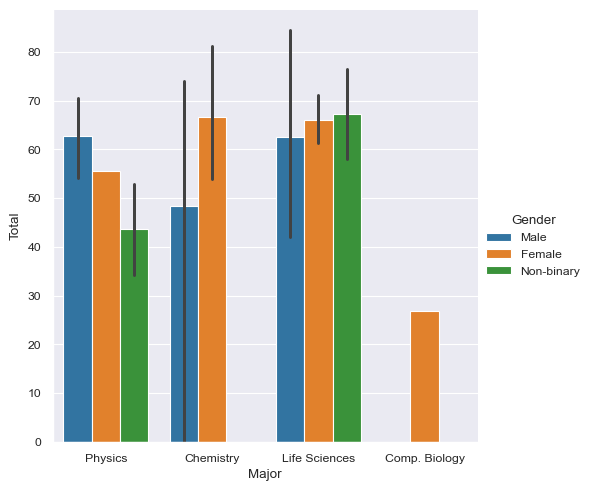

In [6]:
sns.catplot(data=df, x="Major", y="Total", hue="Gender", kind="bar")

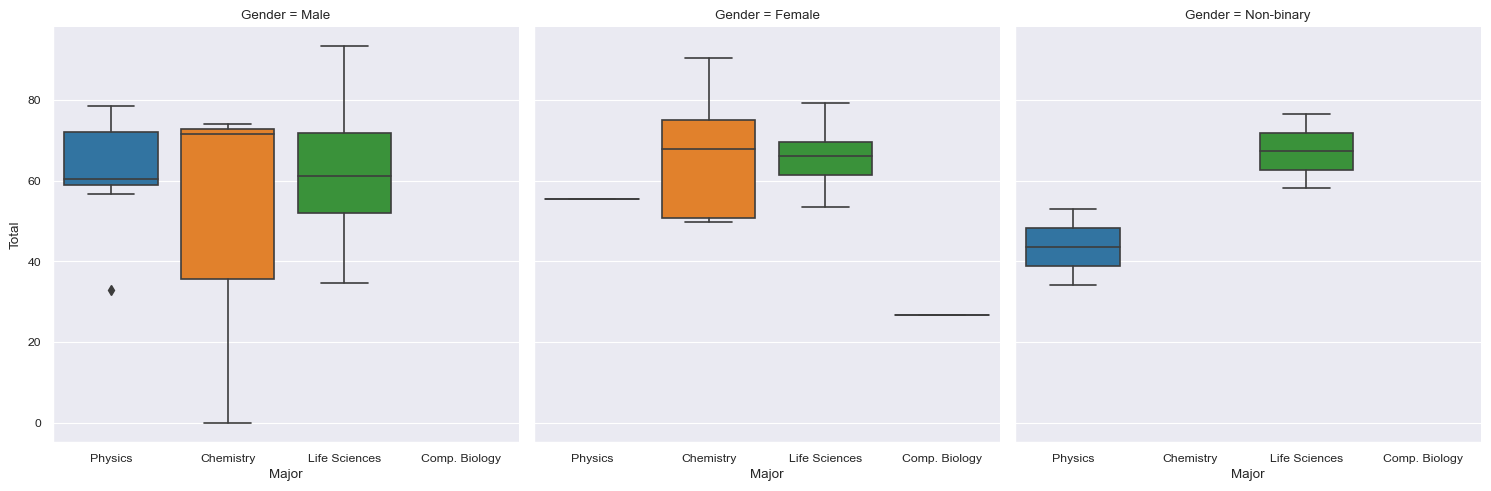

In [7]:
sns.catplot(data=df, x="Major", y="Total", col="Gender", kind="box")

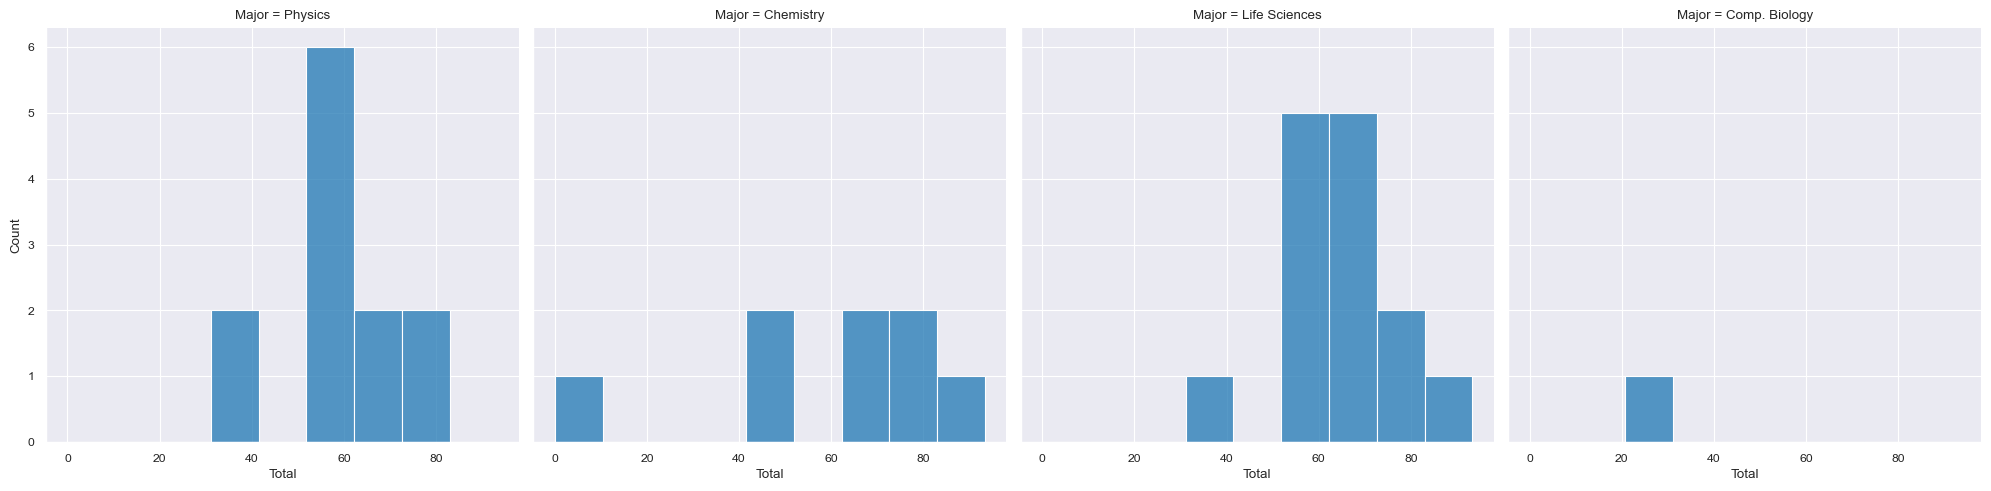

In [8]:
sns.displot(data=df, x='Total', col='Major', multiple="dodge")

## 2 A few more things

### 2.1 Merging dataframes

Merge basically merges rows or columns like a relational database e.g. SQL

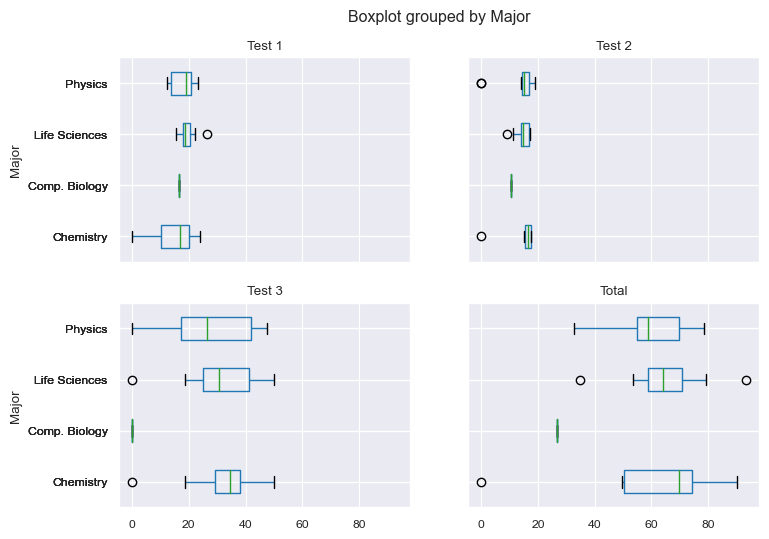

(35, 8)

In [16]:

# Your code here
df_class_1 = pd.read_excel('dummy-class-1-of-2.xlsx', skiprows=1)
df_class_2 = pd.read_excel('dummy-class-2-of-2.xlsx')

# Combine the two datasets
df_combined = pd.merge(
    left=df_class_1,       # dataframe 1
    right=df_class_2,      # dataframe 2
    how='outer',           # Join without losing any data
    left_on='Student No',  # Use to align dataframe 1
    right_on='Student No'  # Use to align dataframe 2
)

# Rename columns
df_combined.rename(
    columns={'Student No': 'MATRIC_NO',
             'Test 1 (30%)': 'Test 1',
             'Test 2 (20%)': 'Test 2',
             'Test 3 (50%)': 'Test 3'},
    inplace=True
)

# Reorgnise/drop columns
df_combined = df_combined[['MATRIC_NO',
                           'Name', 'Major', 'Gender',
                           'Test 1', 'Test 2', 'Test 3']
                          ]

# Replace text with long forms
df_combined.replace(
    to_replace={
        'PHY': 'Physics',
        'CHM': 'Chemistry',
        'LS': 'Life Sciences',
        'CBIO': 'Comp. Biology',
        'F': 'Female',
        'M': 'Male',
        'NB': 'Non-binary'
    }, inplace=True
)

# Remove the ' from Test 2


def clean(text):
    '''
    Function to remove ' ' from column 'Test 2'.
    To be applied using apply()
    '''
    try:
        return text.replace("'", "")
    except AttributeError:
        # This will handle the NaN of the missing data
        return text


df_combined['Test 2'] = df_combined['Test 2'].apply(clean)

# Update column types
df_combined = df_combined.astype({
    'Gender': 'category',
    'Major': 'category',
    'Test 2': 'float'
}
)

df_combined.fillna(0, inplace=True)                      # Fix missing scores
df_combined["Total"] = df_combined[['Test 1', 'Test 2', 'Test 3']].sum(axis=1)
df_combined = df_combined.round(2)
df_combined.to_excel('finalised_scores.xlsx', index=False)
df_combined.head()

df_combined.boxplot(by='Major',
                    column=['Test 1', 'Test 2', 'Test 3', 'Total'],
                    vert=False, figsize=(8, 6))
plt.show()
df_combined.shape

### 2.2 isin()

Returns a boolean series / dataframe showing whether an item is at the location

In [17]:

# Your code here
mask = df_combined.isin(['Maryjane Sandoval', 'Ronin Christian'])
df_combined[mask]

,MATRIC_NO,Name,Major,Gender,Test 1,Test 2,Test 3,Total
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Ronin Christian,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,Maryjane Sandoval,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# df_combined[mask].any(axis=0)
mask.any(axis=0)

MATRIC_NO    False
Name          True
Major        False
Gender       False
Test 1       False
Test 2       False
Test 3       False
Total        False
dtype: bool

In [26]:
mask.any(axis=1)

0     False
1     False
2      True
3     False
4     False
5     False
6     False
7      True
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
dtype: bool

In [24]:
df_combined[mask].any(axis=1)

0     False
1     False
2      True
3     False
4     False
5     False
6     False
7      True
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
dtype: bool

In [25]:
df_combined[df_combined[mask].any(axis=1)]

,MATRIC_NO,Name,Major,Gender,Test 1,Test 2,Test 3,Total
2,A5408925A,Ronin Christian,Physics,Male,18.37,15.56,43.75,77.68
7,A9194090U,Maryjane Sandoval,Life Sciences,Female,18.98,16.40,43.75,79.13


In [27]:
df_combined[mask.any(axis=1)]

,MATRIC_NO,Name,Major,Gender,Test 1,Test 2,Test 3,Total
2,A5408925A,Ronin Christian,Physics,Male,18.37,15.56,43.75,77.68
7,A9194090U,Maryjane Sandoval,Life Sciences,Female,18.98,16.40,43.75,79.13


## Explore 1 :  Graduate Data

In [30]:
# Load dataset
df_employment = pd.read_csv("graduate-employment-survey-ntu-nus-sit-smu-suss-sutd.csv", encoding='latin-1')

In [40]:
# Replace university names with shorter versions
df_employment["university"].replace(
    to_replace={"Nanyang Technological University":"NTU",
     "National University of Singapore":"NUS",
     "Singapore Management University":"SMU",
     "Singapore Institute of Technology":"SIT",
     "Singapore University of Technology and Design":"SUTD",
     "Singapore University of Social Sciences":"SUSS"},
    inplace=True
)

In [42]:
# Replace na with NaN
df_employment.replace(
    to_replace={"na":np.nan},
    inplace=True
)

In [61]:
# Change column types
df_employment = df_employment.astype({
                    "year":"category",
                    "university":"category",
                    "school":"category",
                    "degree":"category",
                    "basic_monthly_median":"float"})

In [62]:
df_employment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121 entries, 0 to 1120
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   year                       1121 non-null   category
 1   university                 1121 non-null   category
 2   school                     1093 non-null   category
 3   degree                     1121 non-null   category
 4   employment_rate_overall    1032 non-null   object  
 5   employment_rate_ft_perm    1032 non-null   object  
 6   basic_monthly_mean         1032 non-null   object  
 7   basic_monthly_median       1032 non-null   float64 
 8   gross_monthly_mean         1032 non-null   object  
 9   gross_monthly_median       1032 non-null   object  
 10  gross_mthly_25_percentile  1032 non-null   object  
 11  gross_mthly_75_percentile  1032 non-null   object  
dtypes: category(4), float64(1), object(7)
memory usage: 130.5+ KB


In [53]:
# Produce pivot table
df_employment.pivot_table(index=["year", "university"], values="basic_monthly_median", aggfunc=[pd.Series.count, np.min, np.max, np.mean, np.std])

count                 amin  \
                basic_monthly_median basic_monthly_median   
year university                                             
2013 NTU                        32.0               2500.0   
     NUS                        33.0               2650.0   
     SMU                        12.0               2800.0   
2014 NTU                        33.0               2600.0   
     NUS                        34.0               2550.0   
     SIT                        24.0               2400.0   
     SMU                        12.0               2850.0   
2015 NTU                        33.0               2800.0   
     NUS                        36.0               2850.0   
     SIT                        25.0               2300.0   
     SMU                        12.0               2900.0   
     SUTD                        3.0               3450.0   
2016 NTU                        34.0               2400.0   
     NUS                        34.0               2800.0   
     SIT                        26.0               2250.0   
     SMU                        12.0               3000.0   
     SUTD                        3.0               3500.0   
2017 NTU                        35.0               2800.0   
     NUS                        37.0               2025.0   
     SIT                        28.0               2300.0   
     SMU                        12.0               3000.0   
     SUTD                        3.0               3600.0   
2018 NTU                        37.0               2800.0   
     NUS                        33.0               1750.0   
     SIT                        32.0               2530.0   
     SMU                        12.0               3000.0   
     SUSS                        3.0               2850.0   
     SUTD                        4.0               3700.0   
2019 NTU                        38.0               3000.0   
     NUS                        36.0               3000.0   
     SIT                        31.0               2350.0   
     SMU                        12.0               3000.0   
     SUSS                        4.0               3000.0   
     SUTD                        4.0               3800.0   
2020 NTU                        40.0               2800.0   
     NUS                        39.0               3000.0   
     SIT                        37.0               2475.0   
     SMU                        12.0               3050.0   
     SUSS                        7.0               2750.0   
     SUTD                        4.0               3800.0   
2021 NTU                        39.0               3000.0   
     NUS                        38.0               2958.0   
     SIT                        33.0               2500.0   
     SMU                        12.0               3400.0   
     SUSS                        8.0               3000.0   
     SUTD                        4.0               3801.0   

                                amax                 mean                  std  
                basic_monthly_median basic_monthly_median basic_monthly_median  
year university                                                                 
2013 NTU                      3500.0          3009.562500           214.472336  
     NUS                      4800.0          3119.030303           473.869476  
     SMU                      5000.0          3493.750000           710.963255  
2014 NTU                      3700.0          3074.242424           212.820058  
     NUS                      5000.0          3265.647059           505.622322  
     SIT                      3355.0          2899.583333           270.446156  
     SMU                      4900.0          3624.166667           653.615238  
2015 NTU                      4184.0          3153.939394           275.998748  
     NUS                      4600.0          3389.055556           427.336531  
     SIT                      3400.0          2958.800000           2

/home/huaen/.local/share/asdf/installs/python/3.11.1/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/home/huaen/.local/share/asdf/installs/python/3.11.1/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/home/huaen/.local/share/asdf/installs/python/3.11.1/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


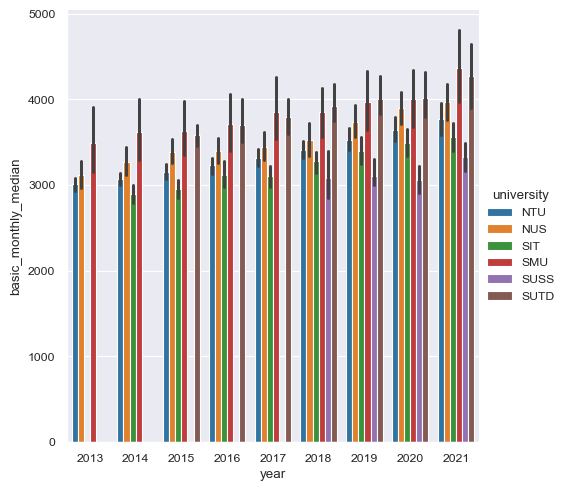

In [66]:
# Produce plot with seaborn
sns.catplot(data=df_employment, x="year", y="basic_monthly_median", hue="university", kind="bar")
plt.show()